In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('F:/data science/Jupyter/work file/datasets/house-prices-advanced-regression-techniques/train.csv')

In [4]:
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

drop low # feature columns

In [14]:
removecol = ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature','Id']

data = data.drop(removecol,axis=1)

fill na with median for int values

In [37]:
# change options for max rows or columns

pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')

In [39]:
# look at columns and use the mean to fill in na values of int or float types

for col in data:
    if data[col].dtype == 'int64' or data[col].dtype == 'float64':
        data[col] = data[col].fillna(data[col].mean())

In [48]:
# same as loop above but changes missing values of objects to the mode (value that shows up most often)

for col in data:
    if data[col].dtype == 'object':
        data[col] = data[col].fillna(data[col].mode().iloc[0]) # must use .iloc[0] for mean because it returns a series

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

create dummy variables

In [51]:
data2 = data.copy()

In [52]:
data2 = pd.get_dummies(data2)

split to training and test data

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
feat = data2.drop(columns = 'SalePrice')

In [64]:
# set 4 variables, features train/test, target train/test. make sure the features are in a matrix. Test size is 20%, and random state just sets a seed for reproductability
feat_train, feat_test, target_train, target_test = train_test_split(feat, data2['SalePrice'], test_size=0.2, random_state = 35)

fit a linear regression model

In [65]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(feat_train, target_train)

LinearRegression()

get r2

In [66]:
lr.score(feat_test, target_test)

0.8726207864799174

get root mean squared error

In [67]:
from sklearn.metrics import mean_squared_error

In [68]:
predict = lr.predict(feat_test)
predict

array([115913.13697868, 141993.85343068, 118771.5673361 , 139641.35156479,
       134213.69840735, 151949.78909803, 131192.11132517, 171168.80603433,
       174275.64325976, 172773.21786407, 154168.55697054, 164284.83031246,
       213389.26335872, 198582.50457661, 212649.56883697, 321550.07006396,
       255246.39332712, 274284.87569609,  86860.47283575, 225731.13771948,
       229289.13564439, 186555.9586594 , 155599.87924887,  97648.00151688,
       201282.28713626, 230533.02316428, 158877.86385194,  95694.81059007,
       108855.88481148, 135210.80207578, 216062.42110224, 313804.36633311,
        91954.32250736, 128236.40852605, 356566.25167859, 132008.7335911 ,
       150353.20813585, 191487.57344617, 469684.36632756,  74332.33916492,
       120991.36756949, 135780.12328294, 113429.26325369, 131948.19601219,
       134918.66306169, 115143.11450101, 226802.89893724, 190639.1100308 ,
       223254.64784074, 123605.07705646, 350963.06980061, 144703.11066537,
       113105.97273012, 1

In [137]:
mse = mean_squared_error(target_test, predict)
mse

886665194.4335419

In [138]:
rmse = np.sqrt(mse)
rmse

29776.923857805425

I was worried about this high variance, but then I realized that the scale is on house prices, and a variance of 30k is fairly small in the grand scheme of things its about a 15ish percent variance in price.

use PCA

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [125]:
# standardize the feature matrix

scaler = StandardScaler()

standfeat_train = scaler.fit_transform(feat_train)
standfeat_test = scaler.transform(feat_test)

In [123]:
# make PCA retain 90% of the variance of the original
pca = PCA(n_components = 0.90, whiten=True)


pcafeat_train = pca.fit_transform(standfeat_train)

print('original features:', standfeat_train.shape[1])
print('reduced features:', pcafeat_train.shape[1])

original features: 270
reduced features: 139


In [126]:
standfeat_train = scaler.fit_transform(feat_train)
standfeat_test = scaler.transform(feat_test)
pcafeat_test = pca.transform(standfeat_test)

print('original features:', standfeat_test.shape[1])
print('reduced features:', pcafeat_test.shape[1])

original features: 270
reduced features: 139


repeat r2 and rmse

In [127]:
lr_pca = LinearRegression()
lr_pca.fit(pcafeat_train, target_train)

LinearRegression()

get r2

In [128]:
lr_pca.score(pcafeat_test, target_test)

0.8367766098960052

In [133]:
predict2 = lr_pca.predict(pcafeat_test)
predict2

array([107301.59818138, 148021.96994602, 156145.2175006 , 138318.16258357,
       118468.37105284, 136362.86297744, 128877.7934344 , 169011.00331352,
       180011.61668549, 185477.80530225, 174315.40493842, 133295.94890197,
       209164.61245134, 199613.75138553, 222151.20106989, 318186.55979469,
       247908.1810957 , 257965.74635747,  81571.34197173, 187085.23213417,
       229828.22934432, 199430.59891151, 179937.14910399, 103278.01878731,
       216228.56480531, 223219.45726004, 150323.09864803,  81282.20305974,
       136736.04035943, 123370.72386698, 231426.628791  , 310769.14407722,
       106552.61257651, 115836.40093298, 339687.49997166, 150154.57861275,
       156352.84574691, 211331.07061009, 424584.67127108,  87020.49741688,
       125609.24710039, 146716.3668602 , 102307.2101392 , 118460.54070769,
       134576.78046591, 125198.37423844, 228808.31789714, 171046.57455926,
       252801.36630932, 116392.77580074, 367417.88896568, 132287.27053884,
        95869.57870497, 1

In [141]:
# run mse on the target test data NOT the pca data, I was banging my head on the wall because of that

mse2 = mean_squared_error(target_test, predict2)
mse2

1136170454.5290127

In [140]:
rmse2 = np.sqrt(mse2)
rmse2

33707.12765171504

### apply min max scaler

In [146]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold

In [147]:
minmax = MinMaxScaler()

minmax_train = minmax.fit_transform(feat_train)

In [154]:
thresh = VarianceThreshold(threshold = 0.1)

highvar_train = thresh.fit_transform(minmax_train)

### run r2 and rmse on high variance data

In [157]:
minmax_train = minmax.fit_transform(feat_train)
minmax_test = minmax.transform(feat_test)


highvar_train = thresh.fit_transform(minmax_train)
highvar_test = thresh.transform(minmax_test)

In [158]:
lr_hv = LinearRegression()
lr_hv.fit(highvar_train, target_train)

LinearRegression()

In [159]:
lr_hv.score(highvar_test, target_test)

0.6352797270509487

In [160]:
predict3 = lr_hv.predict(highvar_test)
predict3

array([132256., 158184., 153288., 133424., 133800.,  98872., 145352.,
       121760., 199160., 213440., 190264., 105000., 227920., 236480.,
       195504., 302960., 239624., 192400.,  66536., 178336., 207368.,
       231864., 138480.,  88728., 231928., 216424., 146984.,  96104.,
       152360., 131416., 268312., 257920., 106696., 144504., 304672.,
       167672., 125984., 218944., 366280., 126120., 114416., 167536.,
        77680., 127536., 140816.,  95456., 233152., 222808., 270144.,
        90736., 290432., 141880., 121192.,  98224., 318792., 152208.,
       206024., 117472., 301576., 245200.,  91528., 109688., 198640.,
       270536., 137056., 160504., 154224.,  95928., 214024., 191264.,
       123616., 237232., 227976., 222880.,  95040., 225560., 178120.,
       122216., 196192., 352816., 153000., 100912., 204664., 184064.,
       152944., 253320., 129168., 178040., 166240.,  76864., 201336.,
       107720., 159712., 119304., 135056., 203256.,  90912., 238336.,
       177288., 1822

In [162]:
mse3 = mean_squared_error(target_test, predict3)
mse3

2538756228.678082

In [163]:
rmse3 = np.sqrt(mse3)
rmse3

50386.07177264449

after running all features through, we ended up with about 30k in variance price for homes, about a 15% variance, which I think is pretty good all things considered. and when running feature extranction, we ended up with about 33k in variance, about the same, a little bit worse but not significantly. When only running through the high variance data, it resulted in a variance of about 50k which is a bit on the high end of price predictions. It makes me realize that high variance data is not enough to go on in order to set up predictors, but the feature extraction is a pretty good option that was not significatntly worse than running all features and it cut out about 130 features, so about half of them.

# part 2 categorical feature selection

In [171]:
mushroom = pd.read_csv('F:/data science/Jupyter/work file/datasets/mushroom data/mushrooms.csv')
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


dummy variables

In [188]:
mushroom2 = mushroom.copy()

In [189]:
# need to set the feature list before changing to dummy var so it doesnt split the target var
mushroom2 = mushroom2.drop(columns = 'class')

mushroom2 = pd.get_dummies(mushroom2)
mushroom2.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


split to test train 

In [190]:
feat2 = mushroom2

feat_train2, feat_test2, target_train2, target_test2 = train_test_split(feat2, mushroom['class'], test_size=0.2, random_state = 35)

create decision tree classifier

In [181]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier(random_state=0)

In [192]:
treemodel = decisiontree.fit(feat_train2,target_train2) 

In [193]:
treepredict = treemodel.predict(feat_test2)
treepredict

array(['p', 'e', 'e', ..., 'e', 'e', 'e'], dtype=object)

In [194]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [196]:
acc = accuracy_score(target_test2,treepredict)
acc

1.0

In [197]:
conf = confusion_matrix(target_test2,treepredict)
conf

array([[856,   0],
       [  0, 769]], dtype=int64)

In [201]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

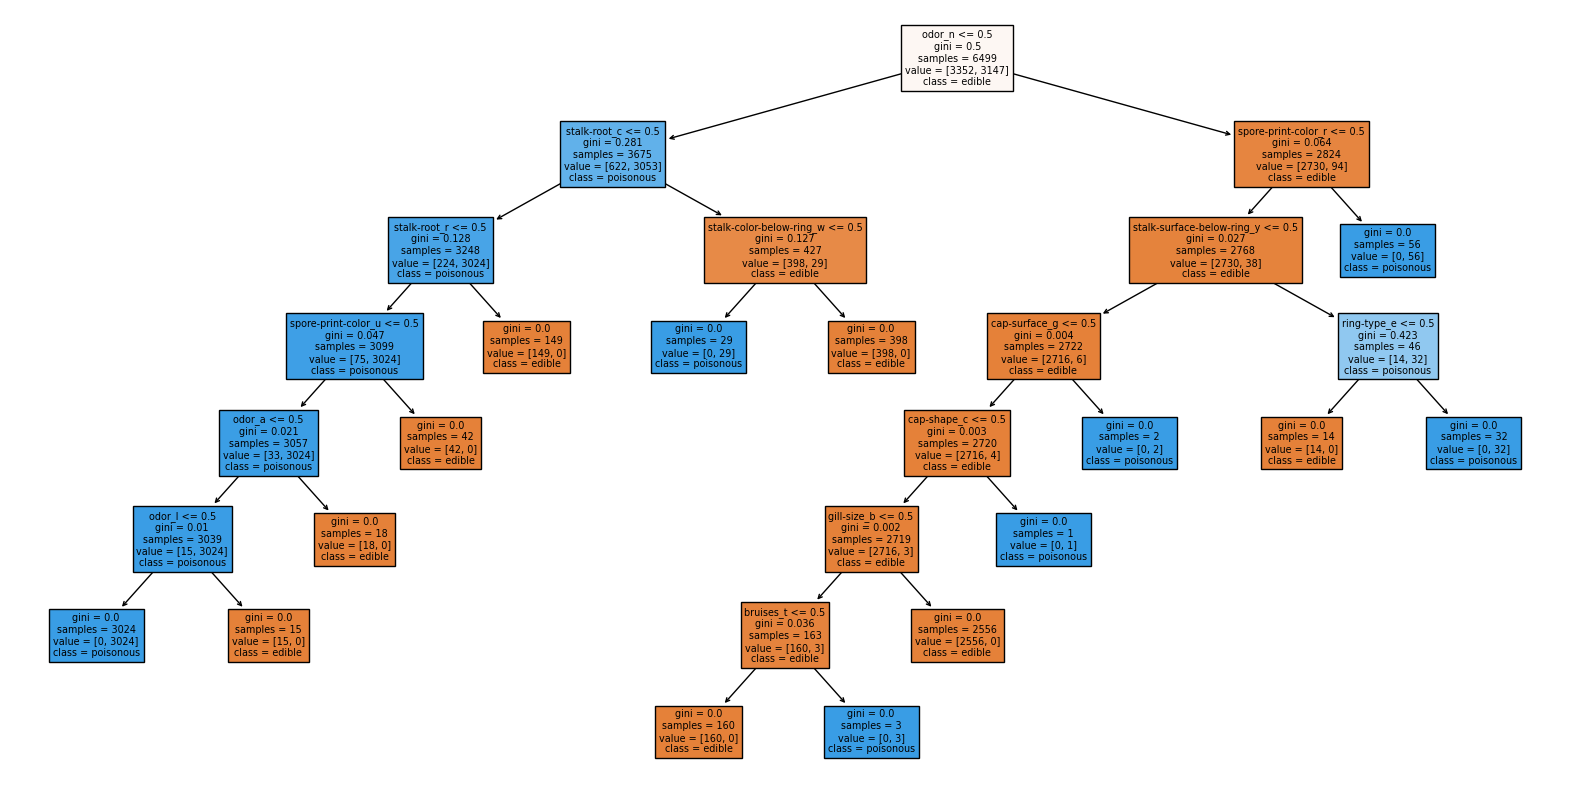

In [203]:
plt.figure(figsize=(20, 10))
plot_tree(treemodel, filled=True, feature_names=feat_train2.columns, class_names=["edible", "poisonous"])
plt.show()

# use x2 (chi squared)

In [205]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [207]:
chi2_selector = SelectKBest(chi2, k=5)
features_kbest = chi2_selector.fit_transform(feat_train2, target_train2)

print('original features:', feat_train.shape[1])
print('reduced features:', features_kbest.shape[1])

original features: 270
reduced features: 5


In [211]:
# the get_support function creates a mask based on the selector that can be used to view the original data and see what features were chosen
mask = chi2_selector.get_support()

best_features = feat_train2.columns[mask]
best_features

Index(['odor_f', 'odor_n', 'gill-color_b', 'stalk-surface-above-ring_k',
       'stalk-surface-below-ring_k'],
      dtype='object')

repeat steps with 5 best features

In [217]:
# set up a new training df based on just the best features

feat_train3 = feat_train2[best_features]

In [219]:
feat_test3 = feat_test2[best_features]

In [218]:
treemodel2 = decisiontree.fit(feat_train3,target_train2) 

In [220]:
treepredict2 = treemodel2.predict(feat_test3)
treepredict2

array(['p', 'e', 'e', ..., 'e', 'e', 'e'], dtype=object)

In [221]:
acc = accuracy_score(target_test2,treepredict2)
acc

0.9286153846153846

In [222]:
conf = confusion_matrix(target_test2,treepredict2)
conf

array([[856,   0],
       [116, 653]], dtype=int64)

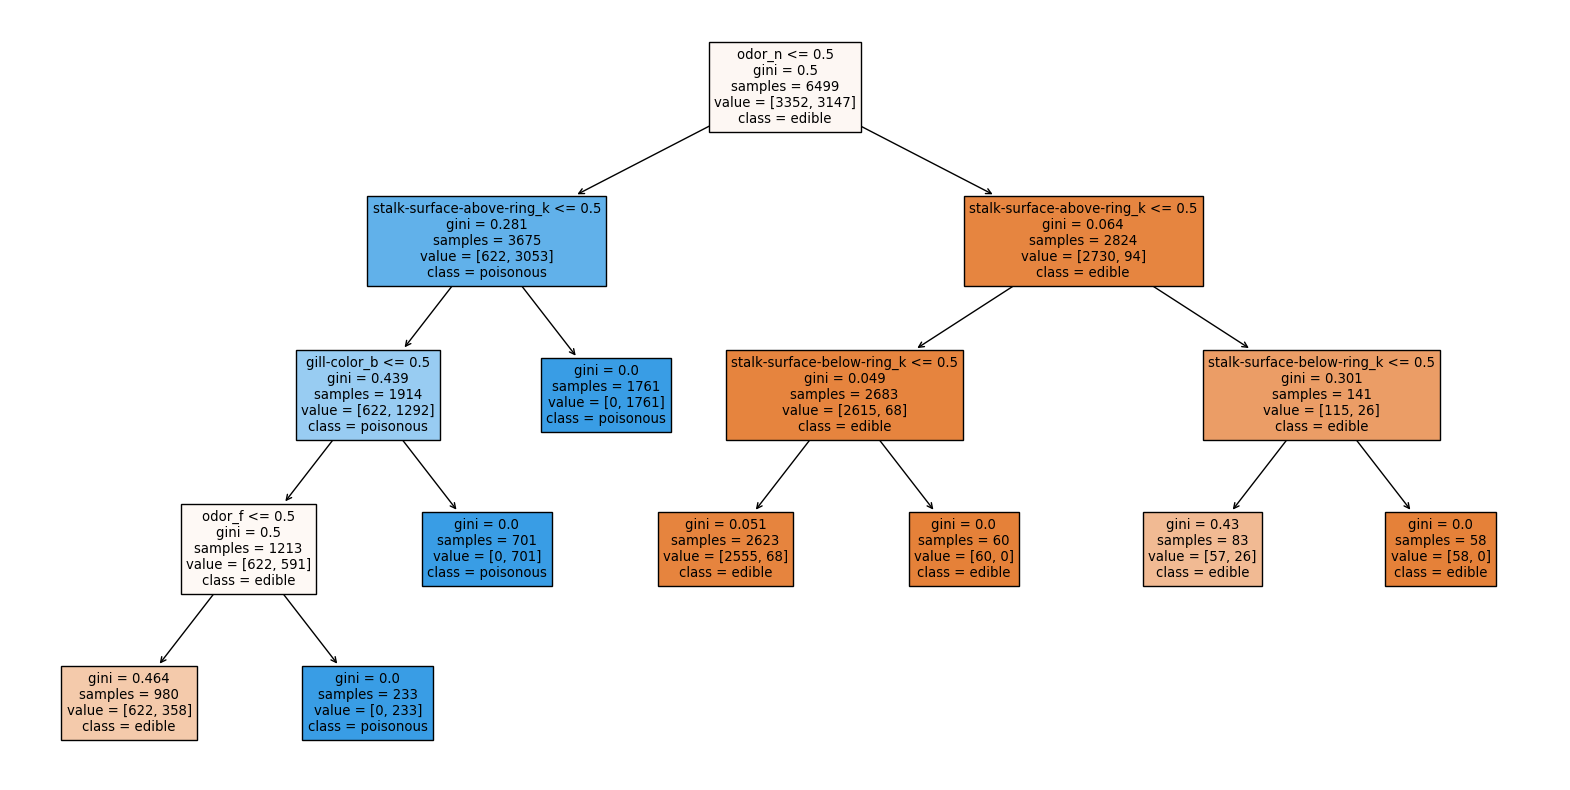

In [223]:
plt.figure(figsize=(20, 10))
plot_tree(treemodel, filled=True, feature_names=feat_train3.columns, class_names=["edible", "poisonous"])
plt.show()

The accuracy of the score is a shocking 92% with only 5 features, and it looks like it was only on a few false negatives, it could likely be expanded just a bit more past 5 features to maybe 10 to get an incredibly high accuracy rating. it seems like there are strong correlations from certain features to determine poison factor of a mushroom.